In [41]:
using LinearAlgebra
using Distributions
using Plots
default(label="", margin=10Plots.pt)

In [42]:
# True position
pos = [-0.6, 2.4]

2-element Vector{Float64}:
 -0.6
  2.4

In [43]:
# Beacon coordinates
b1 = [0.5, 3.5]
b2 = [0.8, 2.5]
b3 = [2.1, 3.2]

2-element Vector{Float64}:
 2.1
 3.2

In [44]:
function measurements(pos, b1,b2,b3; σ=1e-1)
    
    # Noisy distance to beacons
    r1 = norm(pos - b1,2) + σ*randn()
    r2 = norm(pos - b2,2) + σ*randn()
    r3 = norm(pos - b3,2) + σ*randn()
    
    return [r1,r2,r3]
end

r1,r2,r3 = measurements(pos, b1,b2,b3)

3-element Vector{Float64}:
 1.654041887498092
 1.2815752951846147
 2.7904180735385316

In [45]:
function trilateration(r1,r2,r3)
    
    A = (-2*b1[1] + 2*b2[1])
    B = (-2*b1[2] + 2*b2[2])
    C = r1^2 − r2^2 − b1[1]^2 + b2[1]^2 − b1[2]^2 + b2[2]^2
    D = (-2*b2[1] + 2*b3[1])
    E = (-2*b2[2] + 2*b3[2])
    F = r2^2 − r3^2 − b2[1]^2 + b3[1]^2 - b2[2]^2 + b3[2]^2

    x = (C*E - F*B)/(E*A - B*D)
    y = (C*D - A*F)/(B*D - E*A)
    
    return [x,y]
end

pos_est = trilateration(r1,r2,r3)

2-element Vector{Float64}:
 -0.5117894894183621
  2.104753488989132

In [46]:
N = 100
pos_est = zeros(N,2)

for i = 1:100
    
    r1,r2,r3 = measurements(pos, b1,b2,b3)
     
    pos_est[i,:] .= trilateration(r1,r2,r3)
    
end
pos_est

100×2 Matrix{Float64}:
 -0.757838  2.09573
 -0.954069  2.39265
 -0.752753  2.36748
 -0.654129  2.1198
 -0.135477  2.53163
 -0.509908  2.73381
 -0.851151  2.34419
 -0.63265   2.67412
 -0.444801  2.3927
 -0.623308  2.63315
 -0.914481  2.52075
 -0.738393  2.44218
 -0.42212   2.83882
  ⋮         
 -0.834201  2.41517
 -0.421301  2.65131
 -0.433227  2.39135
 -0.512456  2.66776
 -0.807741  2.43864
 -0.663117  2.56231
 -0.303771  2.29502
 -1.04429   2.29944
 -0.734772  2.86073
 -0.657047  2.16009
 -0.457351  2.39125
 -0.762236  2.15328

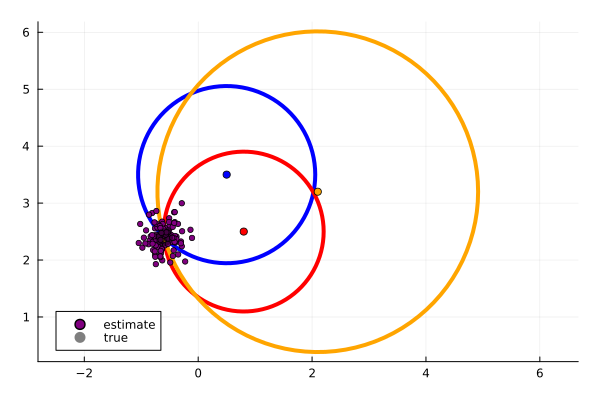

In [48]:
t = range(0.0, stop=2π, length=100)

plot(; aspect_ratio=:equal)

r1 = norm(pos - b1,2)
r2 = norm(pos - b2,2)
r3 = norm(pos - b3,2)

plot!(b1[1] .+ r1*cos.(t), b1[2] .+ r1*sin.(t), lw=4, color="blue")
scatter!([b1[1]], [b1[2]], color="blue")
plot!(b2[1] .+ r2*cos.(t), b2[2] .+ r2*sin.(t), lw=4, color="red")
scatter!([b2[1]], [b2[2]], color="red")
plot!(b3[1] .+ r3*cos.(t), b3[2] .+ r3*sin.(t), lw=4, color="orange")
scatter!([b3[1]], [b3[2]], color="orange")

scatter!(pos_est[:,1], pos_est[:,2], label="estimate", color="purple", markersize=3)

scatter!([pos[1]], [pos[2]], color="black", alpha=0.5, label="true", markersize=10)